# **Classification Analysis Using Perceptron and Least Squares Methods**
---

This report presents an analysis of classification methods applied to distinguish species based on selected features. The study evaluates the Perceptron and Least Squares classifiers across multiple scenarios, assessing their performance in binary and multiclass classification tasks. Key aspects include feature selection, model convergence, misclassification rates, and decision boundary visualizations. The findings highlight the effectiveness of petal-based features, the limitations of the Perceptron in non-linearly separable cases, and the superior stability of the Least Squares approach.

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Functions
from functions import compute_within_class_variance
from functions import compute_between_class_variance
from functions import batch_perceptron
from functions import least_squares_classifier
from functions import least_squares_multiclass
from functions import plot_feature_vectors_with_boundary

<br>

## **1. Dataset Overview and Feature Analysis**

This section provides an overview of the dataset, focusing on its composition and organization. The objective is to understand the dataset's basic structure and key elements, setting the stage for more detailed analyses in subsequent sections

In [2]:
file_name = "Proj1DataSet.xlsx"
df = pd.read_excel(file_name)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# Get the unique values in the 'species' column
pd.unique(df['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
# Get the shape of the data
print(f'Shape of the data (rows, columns): {df.shape}')
print()
df.info()

Shape of the data (rows, columns): (150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Generate a table of descriptive statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species_code']  = df['species'].astype('category').cat.codes 
features = df.columns[:-2].tolist()
class_column = df.columns[-1]
print(f'Features: {features}')

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [7]:
# Get Variance of each feature
print("Variance of each feature:")
df[["sepal_length","sepal_width","petal_length","petal_width"]].var()

Variance of each feature:


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [8]:
# Calculate the Within-Class and Between-Class Variance
within_class_variance = compute_within_class_variance(df, features, class_column)
print()
between_class_variance = compute_between_class_variance(df, features, class_column)

-> Within-Class Variance for Feature 1 (sepal_length): 0.2650081632653062
-> Within-Class Variance for Feature 2 (sepal_width): 0.11538775510204083
-> Within-Class Variance for Feature 3 (petal_length): 0.18518775510204083
-> Within-Class Variance for Feature 4 (petal_width): 0.04188163265306122

-> Between-Class Variance for Feature 1 (sepal_length): 0.42141422222222125
-> Between-Class Variance for Feature 2 (sepal_width): 0.07563288888888878
-> Between-Class Variance for Feature 3 (petal_length): 2.9140186666666668
-> Between-Class Variance for Feature 4 (petal_width): 0.536088888888889


In [9]:
# Check for duplicates
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 1


In [10]:
# Identify and display all duplicate rows
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
101,5.8,2.7,5.1,1.9,virginica,2
142,5.8,2.7,5.1,1.9,virginica,2


In [11]:
# Count the number of occurrences for each species in the dataset
df.groupby("species")[["species"]].count()

,species
species,
setosa,50
versicolor,50
virginica,50


In [29]:
# Calculate the Within-Class Variance
print("Within-Class Variance:")
within_class_variance = compute_within_class_variance(df, features, class_column)
print()
print("Between-Class Variance:")
between_class_variance = compute_between_class_variance(df, features, class_column)

Within-Class Variance:
-> Within-Class Variance for Feature 1 (sepal_length): 0.2650081632653062
-> Within-Class Variance for Feature 2 (sepal_width): 0.11538775510204083
-> Within-Class Variance for Feature 3 (petal_length): 0.18518775510204083
-> Within-Class Variance for Feature 4 (petal_width): 0.04188163265306122

Between-Class Variance:
-> Between-Class Variance for Feature 1 (sepal_length): 0.42141422222222125
-> Between-Class Variance for Feature 2 (sepal_width): 0.07563288888888878
-> Between-Class Variance for Feature 3 (petal_length): 2.9140186666666668
-> Between-Class Variance for Feature 4 (petal_width): 0.536088888888889


#### **OBSERVATIONS**
- The dataset consists of three distinct classes, representing different species of the iris flower:
    - Setosa
    - Versicolor
    - Virginica
- Each class contains 50 observations, leading to a total of 150 samples in the dataset
- The dataset includes four numerical features, each representing a physical characteristic of the flowers:
    - Sepal Length (cm)
    - Sepal Width (cm)
    - Petal Length (cm)
    - Petal Width (cm)
- Feature Variability:
    - Petal Length has the widest range (1.0 to 6.9 cm, Delta = 5.9 cm) and the highest dispersion (std = 1.765, var = 3.116), suggesting strong variation across species.
- Variance Analysis:
    - Petal Length has the highest variance (3.12), confirming that it is the most spread-out feature and likely crucial for distinguishing species.
    - Sepal Width has the lowest variance (0.19), reinforcing that it is the least variable feature and may contribute less to classification.
- Within-Class and Between-Class Variance Analysis:
    - Within-Class Variance: Higher values indicate greater variability within a species, making classification harder, while lower values suggest homogeneity. Sepal-based features show higher within-class variance, reducing their discriminative power.
    - Between-Class Variance: Higher values signify better species separation, aiding classification. Petal Length and Petal Width exhibit the highest between-class variance, confirming their importance in distinguishing species.
- Potential Feature Importance:
    - Sepal Width has the smallest mean (3.06 cm) and lowest variance (0.19), making it the most stable but possibly less useful for differentiation
    - Petal-related features (length & width) have higher dispersion and variance, suggesting they may be stronger indicators for species classification
- These features provide morphological descriptions that can be used to differentiate between species.


<br>

## **2. Distribution, Correlation, and Class Separability Analysis**

In this section, we analyze the distribution of continuous variables, identify potential outliers, and assess feature correlations and class separability. Using visual tools such as histograms, boxplots, and correlation matrices, we explore patterns, relationships, and anomalies in the data. This analysis provides key insights into data variability, feature importance, and classification effectiveness.

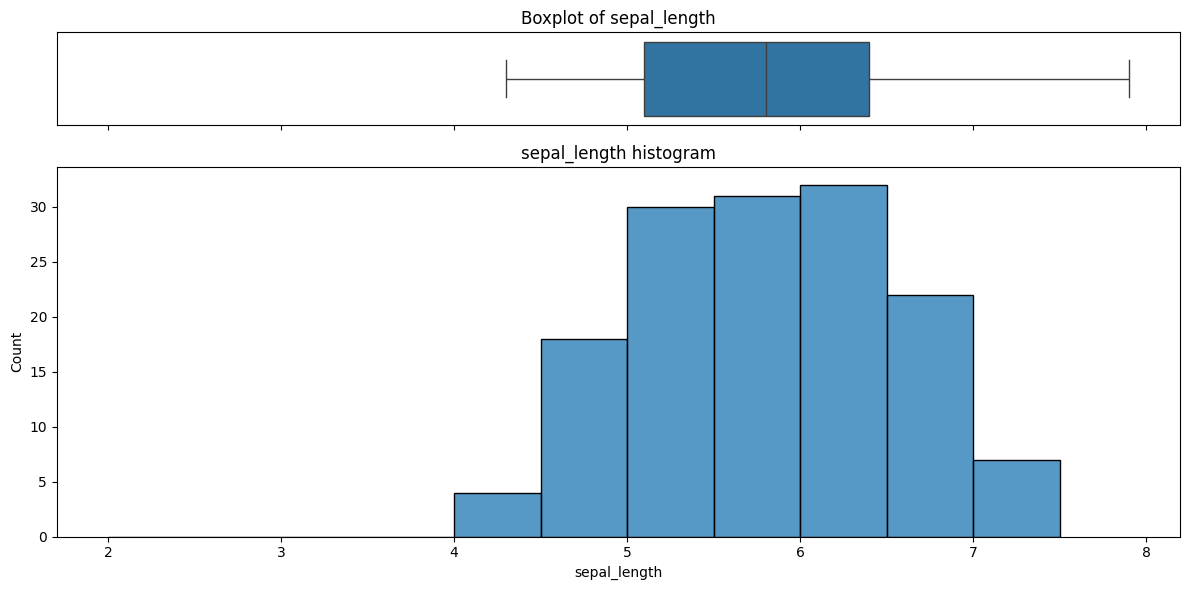

In [13]:
# Boxplot and Histogram of sepal_length
fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)

# Boxplot
sns.boxplot(x=df["sepal_length"], ax=axes[0])
axes[0].set_title("Boxplot of sepal_length")
axes[0].set(yticks=[]) 

# Histogram
sns.histplot(df['sepal_length'], bins=np.arange(2, 8, 0.5), ax=axes[1]) 
axes[1].set_title("sepal_length histogram")

plt.tight_layout()
plt.show()


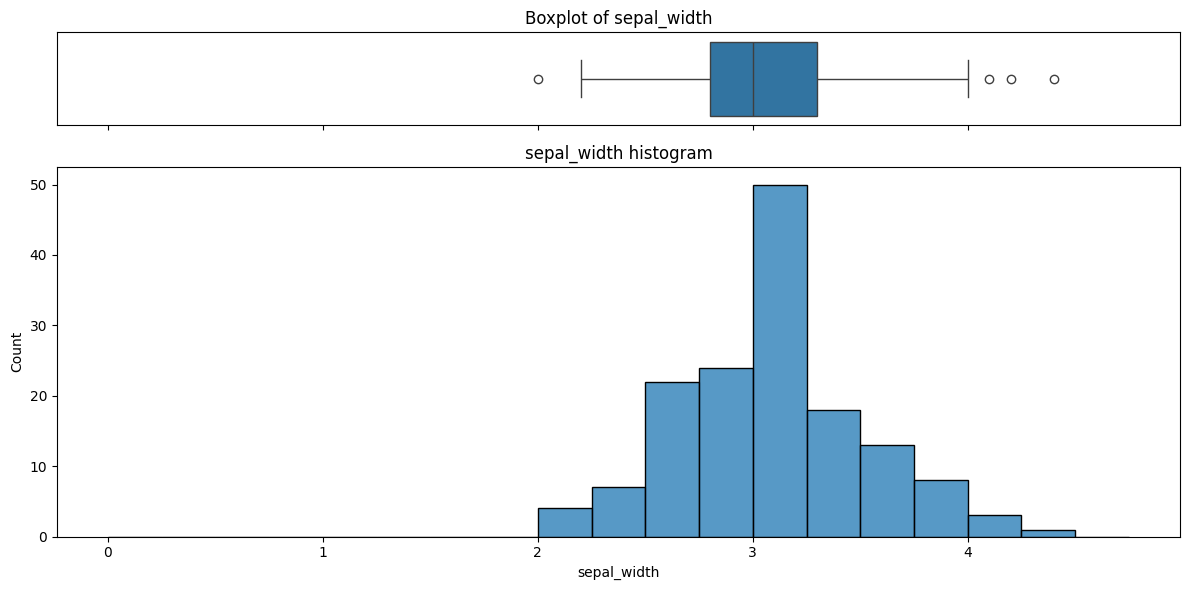

In [14]:
# Boxplot and Histogram of Sepal_width
fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)

# Boxplot
sns.boxplot(x=df["sepal_width"], ax=axes[0])
axes[0].set_title("Boxplot of sepal_width")
axes[0].set(yticks=[]) 

# Histogram
sns.histplot(df['sepal_width'], bins=np.arange(0, 5, 0.25), ax=axes[1]) 
axes[1].set_title("sepal_width histogram")

plt.tight_layout()
plt.show()

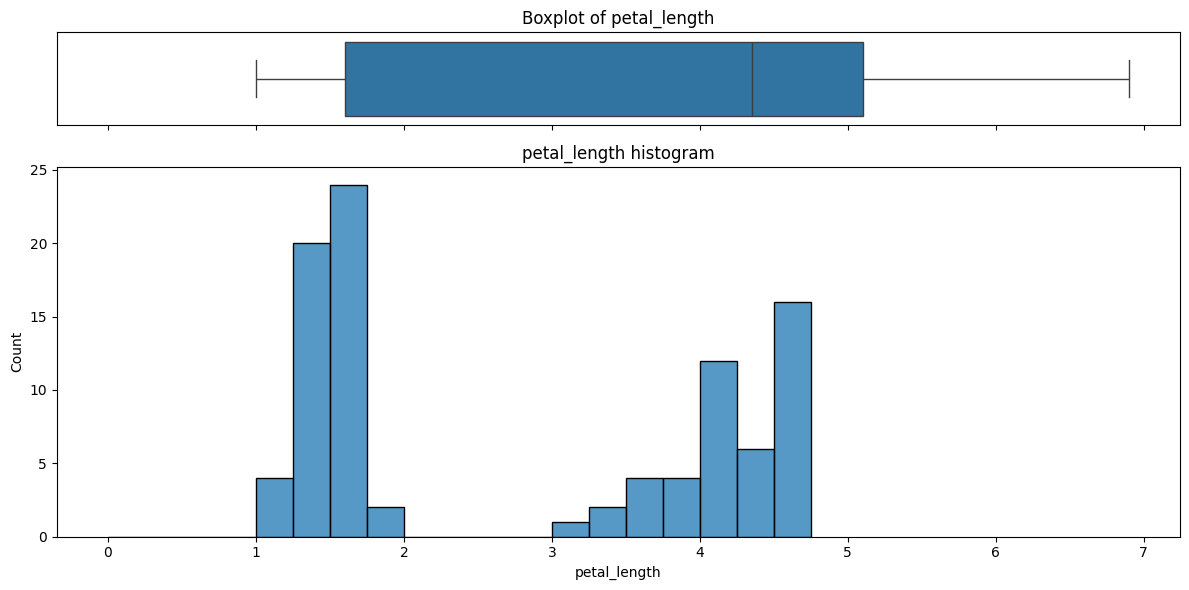

In [15]:
# Boxplot and Histogram of Petal_length
fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)

# Boxplot
sns.boxplot(x=df["petal_length"], ax=axes[0])
axes[0].set_title("Boxplot of petal_length")
axes[0].set(yticks=[])

# Histogram
sns.histplot(df['petal_length'], bins=np.arange(0, 5, 0.25), ax=axes[1]) 
axes[1].set_title("petal_length histogram")

plt.tight_layout()
plt.show()

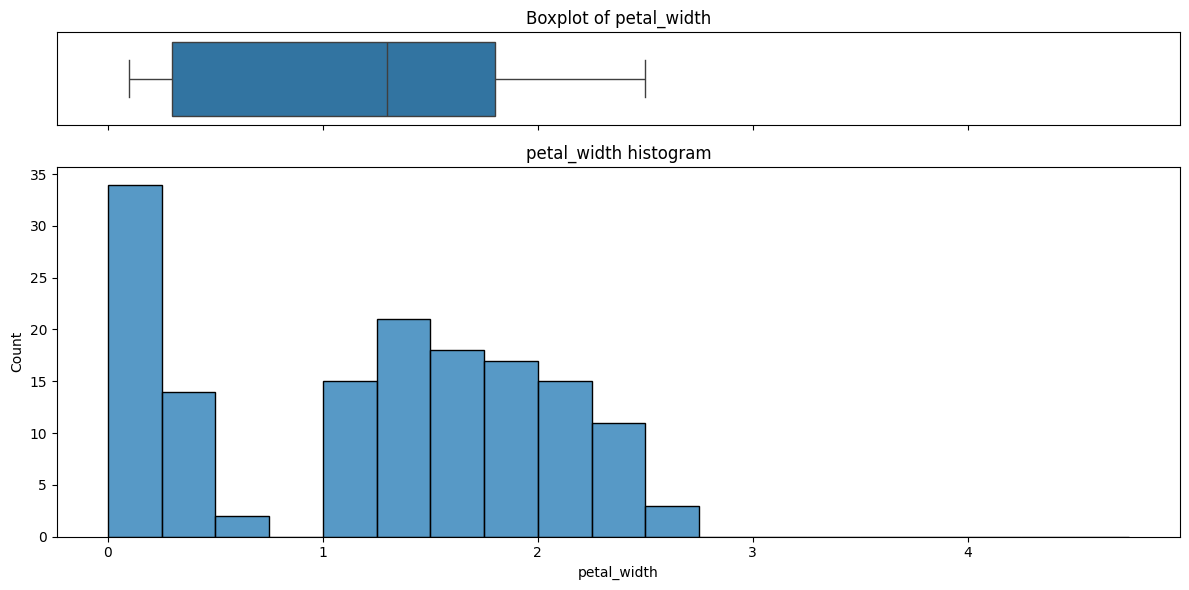

In [16]:
# Boxplot and Histogram of petal_width
fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)

# Boxplot
sns.boxplot(x=df["petal_width"], ax=axes[0])
axes[0].set_title("Boxplot of petal_width")
axes[0].set(yticks=[])  

# Histogramr
sns.histplot(df['petal_width'], bins=np.arange(0, 5, 0.25), ax=axes[1]) 
axes[1].set_title("petal_width histogram")

plt.tight_layout()
plt.show()

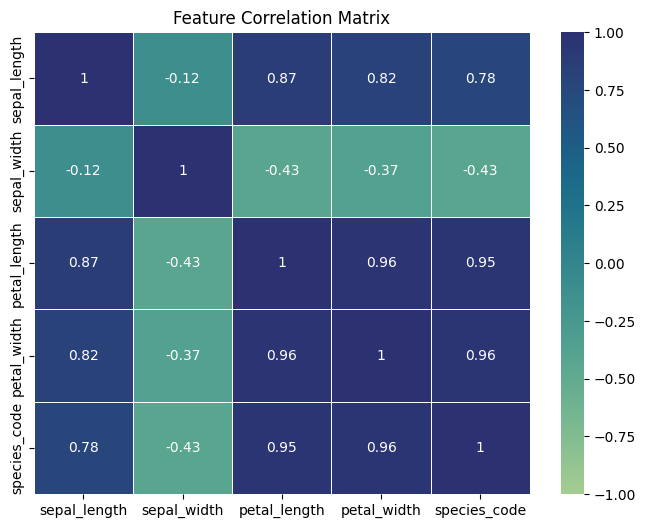

In [17]:
# CORRELATION ANALYSIS
# Compute correlation matrix
columns_to_correlate = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code']

corr_matrix = df[columns_to_correlate].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="crest", center=0, linewidths=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Matrix")
plt.show()


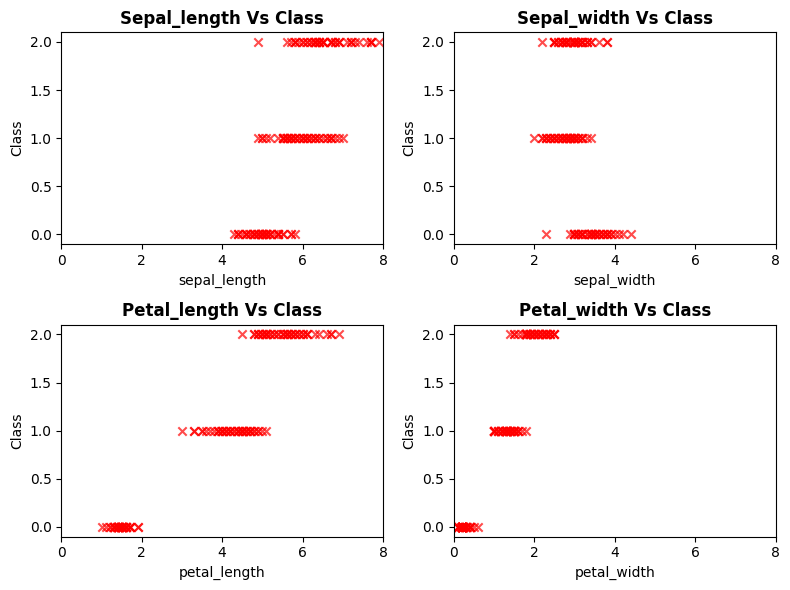

In [18]:
# FEATURE-CLASS RELATIONSHIP
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
#fig.patch.set_facecolor('lightgray')

# Plot each feature vs class label
for i, ax in enumerate(axes.flatten()):
    ax.scatter(df[features[i]], df[class_column], color='r', marker='x', alpha=0.7)
    ax.set_title(f"{features[i].capitalize()} Vs Class", fontsize=12, fontweight='bold')
    ax.set_xlabel(features[i])
    ax.set_ylabel("Class")
    ax.set_xlim([0, 8])

# Adjust layout
plt.tight_layout()
plt.show()

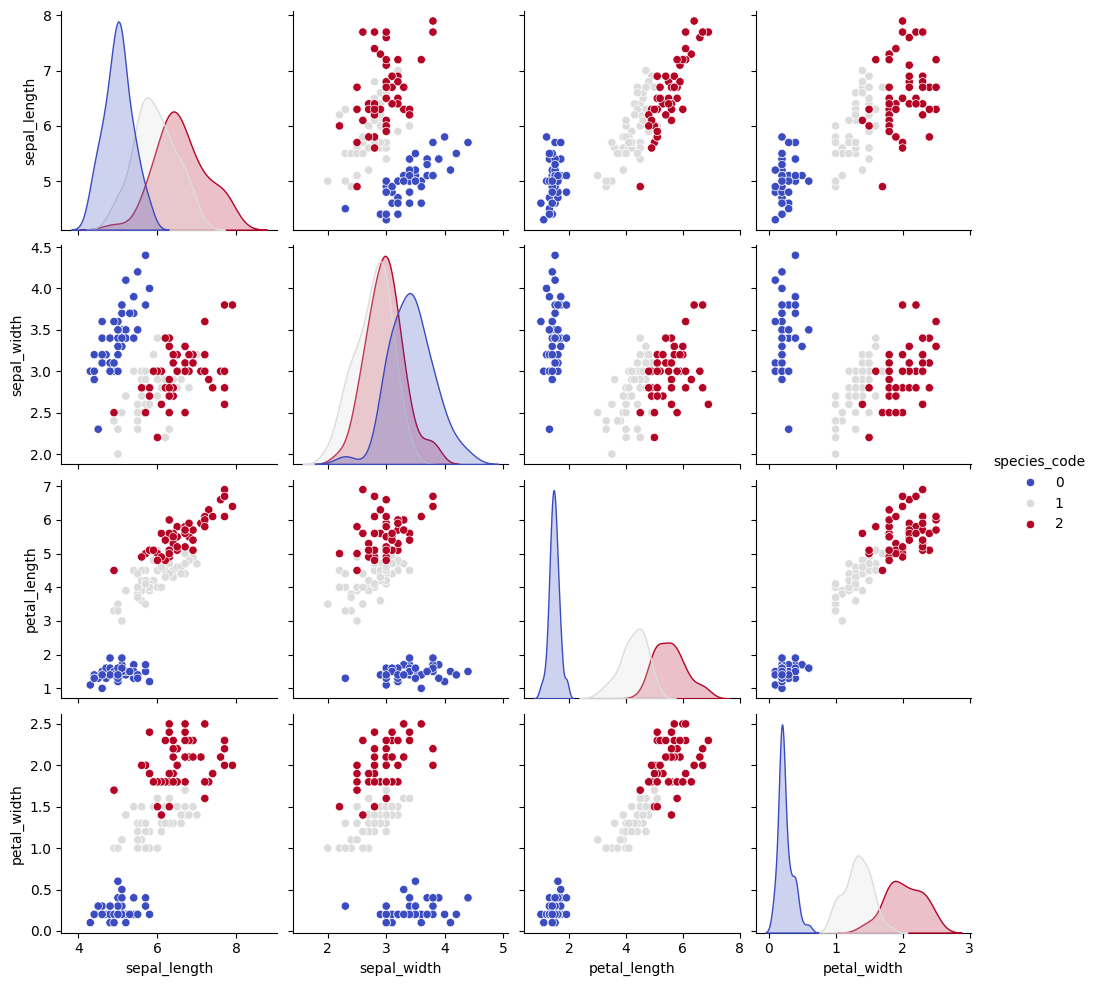

In [19]:
sns.pairplot(df, hue='species_code', palette='coolwarm')

#### **OBSERVATIONS**

**A. Analysis of Boxplots and Histograms**
- Sepal Length
    - Distribution: Most values are between approximately 5 and 7 cm.
    - Shape of the Distribution: The histogram suggests a slightly right-skewed distribution.
    - Outliers: No apparent outliers in the boxplot.
    - Conclusion: The sepal length appears to have a relatively normal distribution, though with a slight skew towards higher values.
- Sepal Width
    - Distribution: Most values are concentrated between 2.5 and 3.5 cm, with a peak around 3 cm.
    - Shape of the Distribution: A slight right-skew is observed.
    - Outliers: Several outliers appear on both the lower and upper ends, indicating possible subgroups within the data.
    - Conclusion: The variability in sepal width is higher compared to sepal length, and the presence of outliers suggests potential differences between groups.
- Petal Length
    - Distribution: A clear bimodal distribution is observed, with two distinct groups of values—one around 1.5 cm and another between 4 and 5 cm.
    - Shape of the Distribution: The strong separation between the two groups suggests the existence of distinct categories within the dataset.
    - Outliers: No evident outliers.
    - Conclusion: The bimodal nature of petal length strongly suggests that the dataset contains at least two separate groups.
- Petal Width
    - Distribution: Another bimodal distribution is present, with values concentrated in two distinct regions—around 0.2 cm and between 1 and 2 cm.
    - Shape of the Distribution: Like petal length, this suggests two clearly separated categories.
    - Outliers: No noticeable outliers.
    - Conclusion: The bimodal nature of petal width further reinforces the idea of distinct groups within the dataset.

**B. Analysis of Feature Correlation Matrix**
- Petal length and petal width strongly correlate with species (0.95 and 0.96), making them the most important features for classification.
- Sepal width has weak or negative correlations with other features (-0.43), suggesting it is the least informative for classification.
- Sepal length is moderately correlated with petal length (0.87) and petal width (0.82), indicating some relationship but less predictive power than petal features.

**C. Analysis of Feature in Class Separation**
- Petal length provides the clearest separation between classes, making it the most useful feature for classification.
- Petal width shows some overlap but still distinguishes classes better than sepal features.
- Sepal length has moderate class separation, but there is overlap.
- Sepal width has the most overlap, making it the least useful for classification.
- Overall, petal features are the strongest predictors, while sepal width contributes the least.

**D. Analysis of Pairplot - Feature Relationships and Class Separability**
- Petal-based features (length & width) show clear species clusters, especially between species 0 (Setosa) and the others.
- Sepal width exhibits the most overlap, indicating its low discriminative power.
- Some correlation exists between sepal length and petal length, but it’s not as strong as petal-based relationships.


<br>

## **3. Classification Methods and Decision Boundary Analysis**

In this section, we explore different classification approaches to distinguish between species based on selected features. Using the Batch Perceptron and Least Squares methods, we train models under multiple scenarios and evaluate their performance. Additionally, we visualize decision boundaries to understand how each classifier separates the classes, highlighting strengths and potential misclassifications.

### **CASE 1**

In [20]:
# DATA PREPARATION ----------------------------------------------------------------------------------
# Define class labels: -1 for "Setosa" and 1 for both "Versicolor" and "Virginica"
classes = {-1: "Setosa", 1: ["Versicolor", "Virginica"]}
df['species_code'] = df['species'].map({'setosa': -1, 'versicolor': 1, 'virginica': 1}).astype(int)

# Select features and target labels
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_code'].values

# Add a bias column (ones) to the feature matrix
X = np.hstack((X, np.ones((X.shape[0], 1))))

# TRAINING: PERCEPTRON MODEL ------------------------------------------------------------------------
# Train the Perceptron model using batch gradient descent
w_perceptron, epochs, misclassification_history = batch_perceptron(X, y,100)
# Report Perceptron results
print("Bath Perceptron Classification:")
print(f" -> Number of epochs: {epochs}")
print(f" -> Computed weight vector: {w_perceptron}")
print(f" -> Number of training misclassifications per epoch: {misclassification_history}")
print()

# TRAINING: LEAST SQUARES CLASSIFIER ----------------------------------------------------------------
# Train the classifier using the Least Squares method
w_least_squares = least_squares_classifier(X, y)
# Make predictions using the trained model
y_pred = np.sign(X @ w_least_squares)
# Count the number of misclassified samples
misclassifications = np.sum(y_pred != y)
# Report Least Squares results
print("Least Squares Classification:")
print(f" -> Computed weight vector: {w_least_squares}")
print(f" -> Number of training misclassifications: {misclassifications}")

Perceptron converged after 7 epochs.
Bath Perceptron Classification:
 -> Number of epochs: 7
 -> Computed weight vector: [-110.1 -273.4  383.7  176.   -55. ]
 -> Number of training misclassifications per epoch: [150, 50, 50, 42, 50, 3, 0]

Least Squares Classification:
 -> Computed weight vector: [-0.13205954 -0.48569574  0.44931423  0.11494546  0.76355422]
 -> Number of training misclassifications: 0


### **CASE 2**

In [21]:
# DATA PREPARATION ----------------------------------------------------------------------------------
# Define class labels: -1 for "Setosa" and 1 for both "Versicolor" and "Virginica"
classes = {-1: "Setosa", 1: ["Versicolor", "Virginica"]}
df['species_code'] = df['species'].map({'setosa': -1, 'versicolor': 1, 'virginica': 1}).astype(int)

# Select features and target labels
X = df[['petal_length', 'petal_width']].values
y = df['species_code'].values

# Add a bias column (ones) to the feature matrix
X = np.hstack((X, np.ones((X.shape[0], 1))))

# TRAINING: PERCEPTRON MODEL ------------------------------------------------------------------------
# Train the Perceptron model using batch gradient descent
w_perceptron, epochs, misclassification_history = batch_perceptron(X, y,100)
# Report Perceptron results
print("Bath Perceptron Classification:")
print(f" -> Number of epochs: {epochs}")
print(f" -> Computed weight vector: {w_perceptron}")
print(f" -> Number of training misclassifications per epoch: {misclassification_history}")
print()

# TRAINING: LEAST SQUARES CLASSIFIER ----------------------------------------------------------------
# Train the classifier using the Least Squares method
w_least_squares = least_squares_classifier(X, y)
# Make predictions using the trained model
y_pred = np.sign(X @ w_least_squares)
# Count the number of misclassified samples
misclassifications = np.count_nonzero(y_pred != y)
# Report Least Squares results
print("Least Squares Classification:")
print(f" -> Computed weight vector: {w_least_squares}")
print(f" -> Number of training misclassifications: {misclassifications}")

Perceptron converged after 7 epochs.
Bath Perceptron Classification:
 -> Number of epochs: 7
 -> Computed weight vector: [  54.1   94.1 -198. ]
 -> Number of training misclassifications per epoch: [150, 50, 50, 50, 50, 48, 0]

Least Squares Classification:
 -> Computed weight vector: [ 0.5026581  -0.01966852 -1.53206671]
 -> Number of training misclassifications: 1


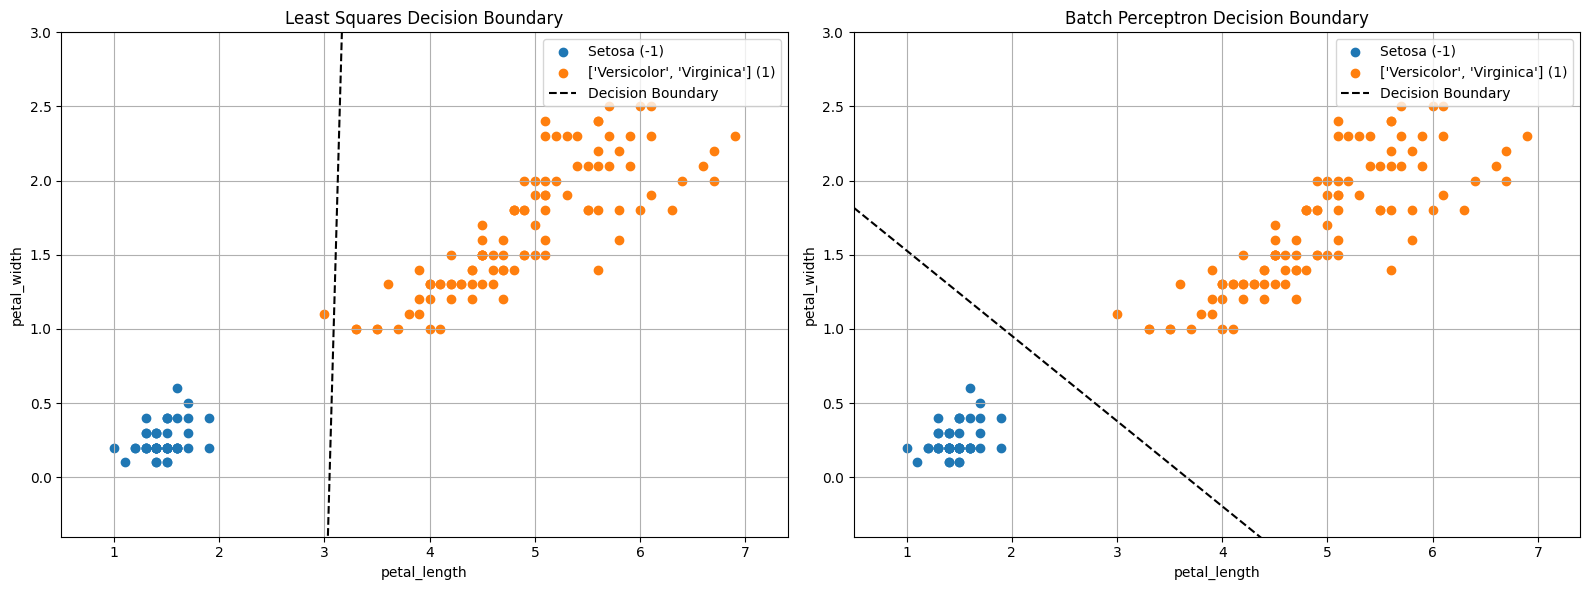

In [22]:
# VISUALIZATION: DECISION BOUNDARY PLOTS
plot_feature_vectors_with_boundary(df, 'petal_length', 'petal_width', [w_least_squares, w_perceptron], classes, model_names=["Least Squares", "Batch Perceptron"])


### **CASE 3**

In [23]:
# DATA PREPARATION ----------------------------------------------------------------------------------
# Define class labels: -1 for "Virginica" and 1 for both "Versicolor" and "Setosa"
classes = {-1: "Virginica", 1: ["Versicolor", "Setosa"]}
df['species_code'] = df['species'].map({'setosa': 1, 'versicolor': 1, 'virginica': -1}).astype(int)

# Select features and target labels
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_code'].values

# Add a bias column (ones) to the feature matrix
X = np.hstack((X, np.ones((X.shape[0], 1))))

# TRAINING: PERCEPTRON MODEL ------------------------------------------------------------------------
# Train the Perceptron model using batch gradient descent
w_perceptron, epochs, misclassification_history = batch_perceptron(X, y,100)
# Report Perceptron results
print("Bath Perceptron Classification:")
print(f" -> Number of epochs: {epochs}")
print(f" -> Computed weight vector: {w_perceptron}")
print(f" -> Number of training misclassifications per epoch: {misclassification_history}")
print()

# TRAINING: LEAST SQUARES CLASSIFIER ----------------------------------------------------------------
# Train the classifier using the Least Squares method
w_least_squares = least_squares_classifier(X, y)
# Make predictions using the trained model
y_pred = np.sign(X @ w_least_squares)
# Count the number of misclassified samples
misclassifications = np.sum(y_pred != y)
# Report Least Squares results
print("Least Squares Classification:")
print(f" -> Computed weight vector: {w_least_squares}")
print(f" -> Number of training misclassifications: {misclassifications}")

Perceptron did not converge within the given iterations.
Bath Perceptron Classification:
 -> Number of epochs: 100
 -> Computed weight vector: [  827.7   771.  -1511.4 -1154.1   416. ]
 -> Number of training misclassifications per epoch: [150, 50, 100, 50, 47, 50, 50, 50, 70, 50, 50, 50, 51, 50, 83, 50, 50, 50, 50, 50, 50, 50, 70, 50, 50, 40, 50, 48, 50, 21, 50, 50, 50, 50, 50, 48, 50, 25, 50, 50, 50, 50, 50, 37, 50, 49, 50, 30, 50, 50, 50, 47, 50, 29, 50, 50, 50, 48, 50, 30, 50, 50, 50, 47, 50, 29, 48, 50, 50, 44, 50, 39, 50, 47, 50, 33, 48, 48, 50, 42, 50, 44, 50, 37, 48, 47, 50, 33, 47, 48, 49, 37, 48, 47, 49, 31, 42, 47, 49, 31]

Least Squares Classification:
 -> Computed weight vector: [ 0.09175217 -0.40553677 -0.00797582 -1.10355865  2.39056373]
 -> Number of training misclassifications: 11


### **CASE 4**

In [24]:
# DATA PREPARATION ----------------------------------------------------------------------------------
# Define class labels: -1 for "Virginica" and 1 for both "Versicolor" and "Setosa"
classes = {-1: "Virginica", 1: ["Versicolor", "Setosa"]}
df['species_code'] = df['species'].map({'setosa': 1, 'versicolor': 1, 'virginica': -1}).astype(int)

# Select features and target labels
X = df[['petal_length', 'petal_width']].values
y = df['species_code'].values

# Add a bias column (ones) to the feature matrix
X = np.hstack((X, np.ones((X.shape[0], 1))))

# TRAINING: PERCEPTRON MODEL ------------------------------------------------------------------------
# Train the Perceptron model using batch gradient descent
w_perceptron, epochs, misclassification_history = batch_perceptron(X, y,500)
# Report Perceptron results
print("Bath Perceptron Classification:")
print(f" -> Number of epochs: {epochs}")
print(f" -> Computed weight vector: {w_perceptron}")
print(f" -> Number of training misclassifications per epoch: {misclassification_history}")
print()

# TRAINING: LEAST SQUARES CLASSIFIER ----------------------------------------------------------------
# Train the classifier using the Least Squares method
w_least_squares = least_squares_classifier(X, y)
# Make predictions using the trained model
y_pred = np.sign(X @ w_least_squares)
# Count the number of misclassified samples
misclassifications = np.sum(y_pred != y)
# Report Least Squares results
print("Least Squares Classification:")
print(f" -> Computed weight vector: {w_least_squares}")
print(f" -> Number of training misclassifications: {misclassifications}")

Perceptron did not converge within the given iterations.
Bath Perceptron Classification:
 -> Number of epochs: 500
 -> Computed weight vector: [ -73.2 -906.4 1803. ]
 -> Number of training misclassifications per epoch: [150, 50, 100, 50, 100, 50, 100, 50, 100, 50, 100, 50, 100, 50, 98, 50, 88, 50, 78, 50, 78, 37, 53, 50, 68, 6, 21, 50, 54, 29, 50, 50, 53, 21, 50, 50, 50, 50, 54, 8, 6, 9, 28, 50, 50, 50, 22, 50, 50, 50, 47, 51, 6, 10, 28, 50, 50, 50, 23, 50, 50, 50, 40, 50, 34, 50, 50, 50, 8, 6, 8, 6, 8, 6, 9, 21, 50, 50, 50, 46, 50, 15, 40, 50, 50, 44, 50, 21, 50, 50, 50, 44, 50, 23, 50, 50, 50, 37, 50, 40, 50, 36, 50, 43, 50, 26, 50, 50, 50, 30, 50, 50, 50, 17, 40, 50, 50, 32, 50, 50, 50, 12, 22, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 50, 40, 50, 37, 50, 39, 50, 37, 48, 38, 48, 37, 48, 37, 48, 37, 46, 35, 44, 34, 42, 34, 43, 34, 42, 34, 42, 34, 42, 33, 4

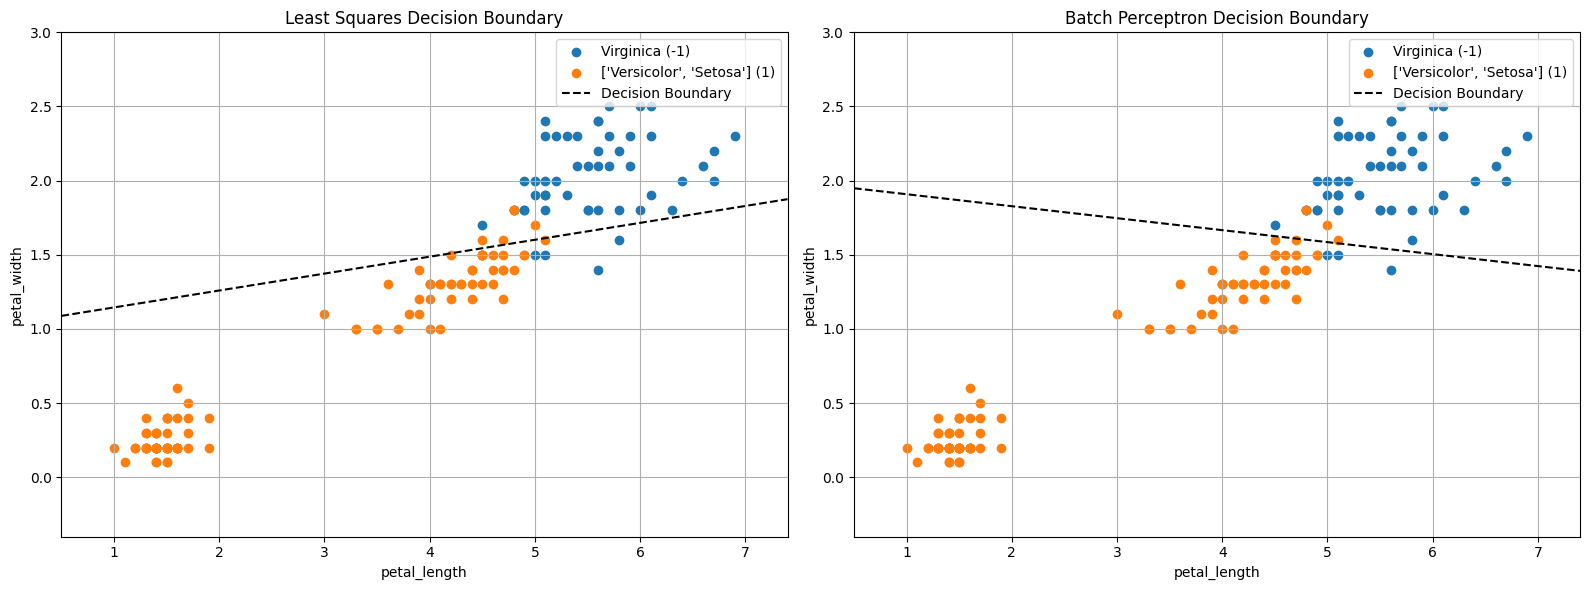

In [25]:
# VISUALIZATION: DECISION BOUNDARY PLOTS
plot_feature_vectors_with_boundary(df, 'petal_length', 'petal_width', [w_least_squares, w_perceptron], classes, model_names=["Least Squares", "Batch Perceptron"])

### **CASE 5**

In [26]:
# DATA PREPARATION ----------------------------------------------------------------------------------
# Define class labels: 0 for "Setosa", 1 for "Versicolor", and 2 for "Virginica"
classes = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df['species_code'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).astype(int)

# Select features and target labels
X = df[['petal_length', 'petal_width']].values

# Convert class labels into a One-Hot encoded matrix (multiclass classification)
T = np.eye(len(classes))[df['species_code']]

# Add a bias column (ones) to the feature matrix
X = np.hstack((X, np.ones((X.shape[0], 1))))

# TRAINING: LEAST SQUARES CLASSIFIER ----------------------------------------------------------------
# Train the model using the Least Squares approach for multiclass classification
w_least_squares = least_squares_multiclass(X, T)

# Make predictions using the trained model (The class with the highest value in the output is selected)
y_pred = np.argmax(X @ w_least_squares, axis=1) 

# Count the number of misclassified samples
misclassifications = np.sum(y_pred != df['species_code'].values)

# Report results
print("Least Squares Multiclass Classification:")
print(f" -> Computed weight matrix:\n{w_least_squares}")
print(f" -> Number of training misclassifications: {misclassifications}")


Least Squares Multiclass Classification:
 -> Computed weight matrix:
[[-0.25132905  0.32433516 -0.07300611]
 [ 0.00983426 -0.65008953  0.64025527]
 [ 1.26603335 -0.10584416 -0.16018919]]
 -> Number of training misclassifications: 34


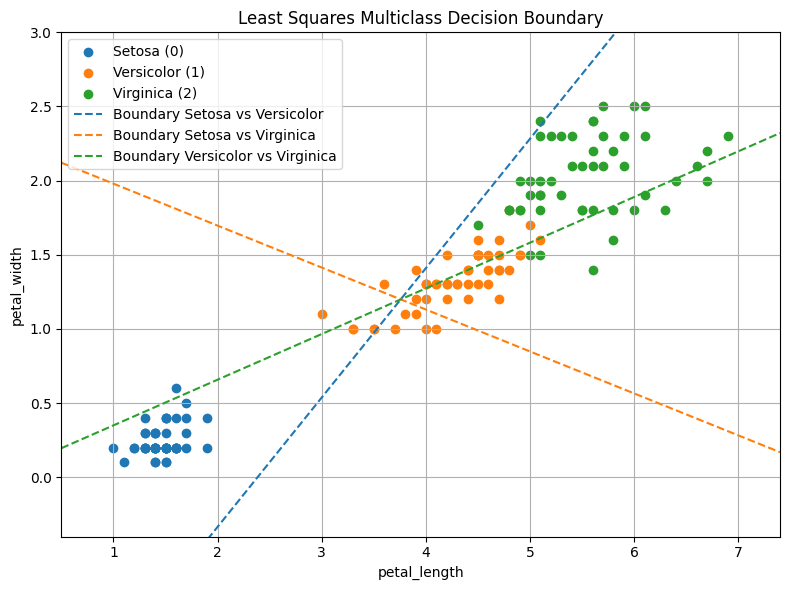

In [27]:
# VISUALIZATION: DECISION BOUNDARY PLOTS
plot_feature_vectors_with_boundary(df, 'petal_length', 'petal_width', [w_least_squares], classes, model_names=["Least Squares Multiclass"])

#### **OBSERVATIONS**

**A. Perceptron vs. Least Squares Performance**
- Perceptron converged in Cases 1 & 2 but failed in Cases 3 & 4, reinforcing its sensitivity to linearly separable data.
- Least Squares performed consistently well in Cases 1 & 2, achieving 0 or minimal misclassifications.
- In Case 4, Perceptron did not converge but achieved fewer misclassifications than Least Squares, suggesting it was still learning a reasonable separation.
- Multiclass classification (Case 5) showed more difficulty, with 34 misclassifications, highlighting the increased complexity when distinguishing three classes.

**B. Decision Boundary Observations**
- Case 2 (Setosa vs. Others)
    - Least Squares: The boundary is nearly vertical, effectively separating Setosa from Versicolor and Virginica.
    - Perceptron: The decision boundary is more diagonal, suggesting a different approach to classification.
    - Both classifiers perform well in this case, as Setosa is highly distinguishable.
- Case 4 (Virginica vs. Others)
    - Least Squares: The decision boundary is well-placed but results in 8 misclassifications, particularly due to overlap between Versicolor and Virginica
    - Perceptron: Did not converge, but achieved fewer misclassifications than Least Squares, indicating that it was still improving the separation despite the lack of convergence.
- Case 5 (Multiclass Classification)
    - Least Squares creates three decision boundaries, each attempting to separate Setosa, Versicolor, and Virginica.
    - Some overlap occurs, particularly between Versicolor and Virginica, which aligns with the 34 misclassifications observed.

**C. Feature Importance Confirmed**
- Petal features alone (Cases 2 & 4) provide good separability.
- Adding sepal features (Cases 1 & 3) does not significantly improve classification, further proving their lower importance.